**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso:** Electiva Aprendizaje Automático

**Segundo Semestre 2025**

**Profesor:** Dr. Luis-Alexander Calvo-Valverde

---

**Trabajo Práctico:** 1

**Datos de la entrega:** Jueves 2 de octubre 2025, a más tardar a las 6:00 pm.

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter (`.ipynb`) y todos los archivos adicionales que se requieran para correr su cuaderno (en un archivo comprimido).

---

**Estudiantes:**
- David Alberto Guevara Sánchez
- Kenneth Barboza Corrales

# Favor leer esto primero.

1. Se le adjunta material sobre Series Temporales en PDF, debe estudiarlo antes de proceder con la solución del presente Trabajo Práctico. Se adjuntan los archivos `.csv` requeridos por si desea probar el código de dicho material. El código que incluye el material podría requerir alguna modificación por su parte, esto por el conocido proceso de actualización de las bibliotecas.

2. Usted puede cambiar los archivos de series temporales que se le proporcionan por otras series temporales que sean de su interés; pero de hacerlo, se le recomienda valorarlo con el profesor para que sus series temporales no le agreguen una complicación importante al Trabajo Práctico.

# Parte 1.  Series temporales y graficación (35 puntos)

1. **Utilizando el archivo la serie temporal en el archivo: `TS_d_1`**, realice la presente sección.
2. Complete en celdas de código y/o texto según convenga.
3. Documente bien su código.

In [2]:
from typing import cast

import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable series

In [4]:
df1: Series = cast(
    Series,
    pd.read_csv("./data/TS_d_1.csv", parse_dates=[0], index_col=0).squeeze(),
)
df1.index = pd.to_datetime(df1.index, format="%d/%m/%Y")
df1.head(5)

fecha
2004-01-01    5.3
2004-01-02    5.6
2004-01-03    5.9
2004-01-04    6.2
2004-01-05    8.4
Name: temperatura, dtype: float64

In [5]:
type(df1)

pandas.core.series.Series

### 1.2
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [6]:
print(f"""
promedio: {df1.mean()}
mediana: {df1.median()}
varianza: {df1.var()}
desviación estandar: {df1.std()}
""")


promedio: 8.013887134133503
mediana: 7.4
varianza: 14.93009508077167
desviación estandar: 3.8639481208695945



### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los Eneros, luego el promedio para todos los Febreros, y así sucesivamente.

In [7]:
monthly_avg = df1.groupby(df1.index.month).mean()
monthly_avg.index = df1.index.month_name("ES_es").unique()

for month, avg_temp in monthly_avg.items():
    print(f"{month}: {avg_temp:.4f} °C")

Enero: 7.6881 °C
Febrero: 7.7358 °C
Marzo: 7.8743 °C
Abril: 8.5248 °C
Mayo: 8.2218 °C
Junio: 7.2733 °C
Julio: 7.7063 °C
Agosto: 8.2269 °C
Septiembre: 8.8217 °C
Octubre: 8.4986 °C
Noviembre: 7.8068 °C
Diciembre: 7.7761 °C


### 1.4
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [8]:
lag_features = pd.DataFrame(df1)
for i in range(1, 6):
    lag_features[f"t-{i - 1}"] = df1.shift(i)

lag_features = lag_features.rename(columns={"temperatura": "t+1", "t-0": "t"})
lag_features.head(7)

,t+1,t,t-1,t-2,t-3,t-4
fecha,,,,,,
2004-01-01,5.3,NaN,NaN,NaN,NaN,NaN
2004-01-02,5.6,5.3,NaN,NaN,NaN,NaN
2004-01-03,5.9,5.6,5.3,NaN,NaN,NaN
2004-01-04,6.2,5.9,5.6,5.3,NaN,NaN
2004-01-05,8.4,6.2,5.9,5.6,5.3,NaN
2004-01-06,7.9,8.4,6.2,5.9,5.6,5.3
2004-01-07,7.6,7.9,8.4,6.2,5.9,5.6


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [9]:
window_method = pd.DataFrame(df1)
width = 3
shifted = window_method.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat(
    [window.min(), window.mean(), window.max(), window_method], axis=1
)
dataframe.columns = ["min", "mean", "max", "t+1"]
dataframe.head(10)

,min,mean,max,t+1
fecha,,,,
2004-01-01,NaN,NaN,NaN,5.3
2004-01-02,NaN,NaN,NaN,5.6
2004-01-03,NaN,NaN,NaN,5.9
2004-01-04,NaN,NaN,NaN,6.2
2004-01-05,5.3,5.600000,5.9,8.4
2004-01-06,5.6,5.900000,6.2,7.9
2004-01-07,5.9,6.833333,8.4,7.6
2004-01-08,6.2,7.500000,8.4,7.7
2004-01-09,7.6,7.966667,8.4,7.1


### 1.6
- A la variable series, aplíquele la instrucción `series.plot()`.
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

<Axes: xlabel='fecha'>

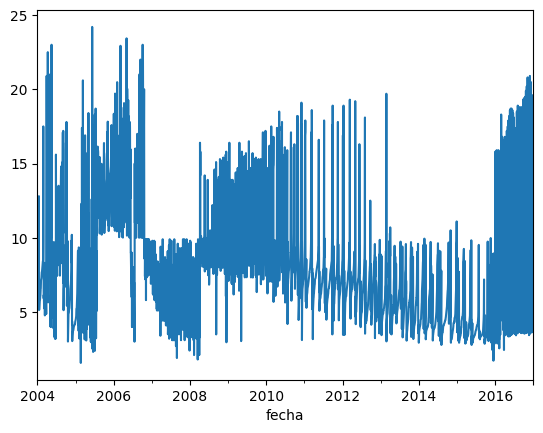

In [10]:
df1.plot()

No se puede ver una tendencia clara en el plot, por ejemplo en los primeros 3 años se tiene una variabilidad muy fuerte que fluctúa entre alto y bajo pero luego se pierde en años siguientes. La irregularidad de estos patrones sugiere que no se presenta estacionalidad.
Lo que sí sugieren los cambios repentinos volatiles en los valores de la temperatura de algunos años es la posible falta de datos, mucho ruido o _outliers_ que afecten el plot.

### 1.7
- Muestre el histograma de la variable series.
- ¿Qué conclusiones puede sacar del comportamiento de los datos?

<Axes: >

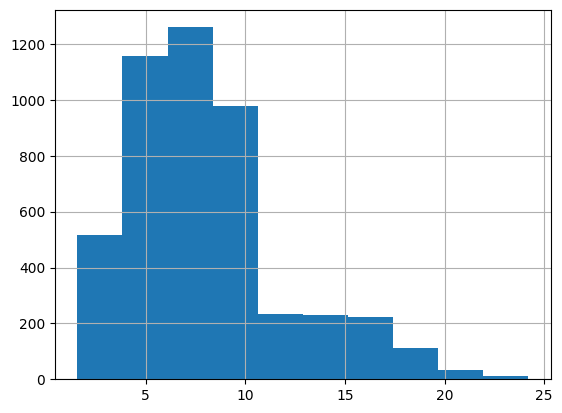

In [11]:
df1.hist()

Los valores se asemejan mucho a una distribución normal pero tienden a inclinarse por los rangos mas bajos de 5 a 10.
Se sugiere que el promedio se inclina a los valores mayores debido a estos picos también. Lo que podría causar una imagen errónea de su distribución si solo vemos promedio como variable estadística.

### 1.8
- Agrupe los datos de la variable serie de manera Anual, y muestre los `boxplot` de cada año.
1. ¿Cómo se interpreta un gráfico `boxplot`?
2. ¿Qué conclusiones puede sacar del comportamiento de los datos?

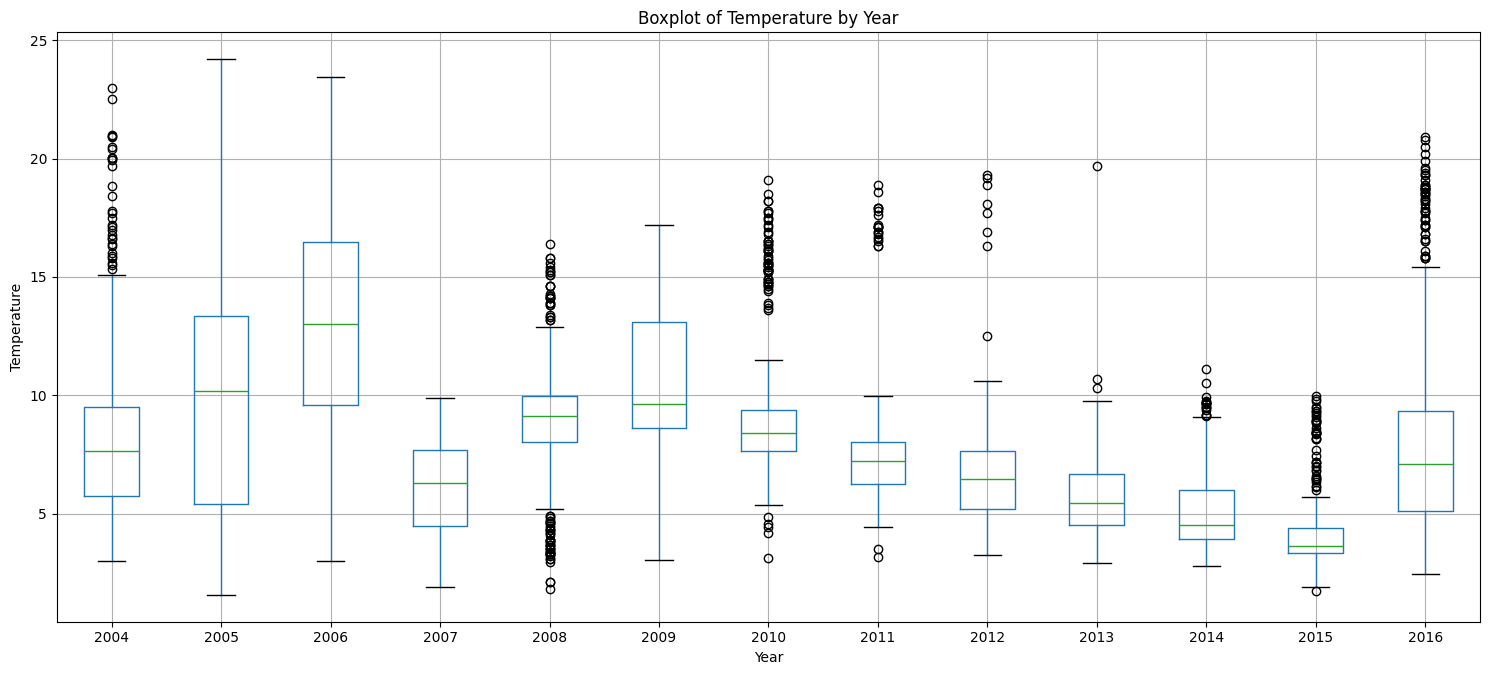

In [19]:
df_yearly = pd.DataFrame(df1)
df_yearly["year"] = df_yearly.index.year

plt.figure(figsize=(15, 7))
df_yearly.boxplot(column="temperatura", by="year", ax=plt.gca())
plt.title("Boxplot of Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.suptitle("")
plt.tight_layout()
plt.show()

#### 1. ¿Cómo se interpreta un gráfico `boxplot`?

En base a sus parte la caja representa los intercuartiles $Q1 = 25\%$ del valor de los datos y $Q3 = 75\%$ del valor de los datos, dentro de la caja esta el Q2 o mediana que representa el valor justo al medio. Los bigotes  se posicionan en el valor mínimo y máximo dentro de un rango a los quartiles internos y los puntos fuera representan posible valores atípicos o _outliers_.

#### 2. ¿Qué conclusiones puede sacar del comportamiento de los datos?

Los años 2004 a 2006 parecen tener una primera tendencia, tanto a ser mas cálidos en general a como tener mayor variabilidad en sus temperaturas. Después de eso del 2007 al 2015 las temperaturas son mas bajas y estables presentando incluso una tendencia o ciclo descendiente. Todo regresa muy parecido a la sección del 2004 en el 2016 donde la varianza, temperature y media suben.

La mayoría los años presentan outlier en ambas direcciones, tanto picos de temperaturas altas extremas como bajas extremas. Esto sugiere que no es inusual tener días con temperatures extremas

### 1.9
- Muestre el Lag Scatter plot de la variable series.
    1. ¿Cómo se interpreta un Lag Scatter plot?
    2. ¿Qué conclusiones puede sacar del comportamiento de los datos?

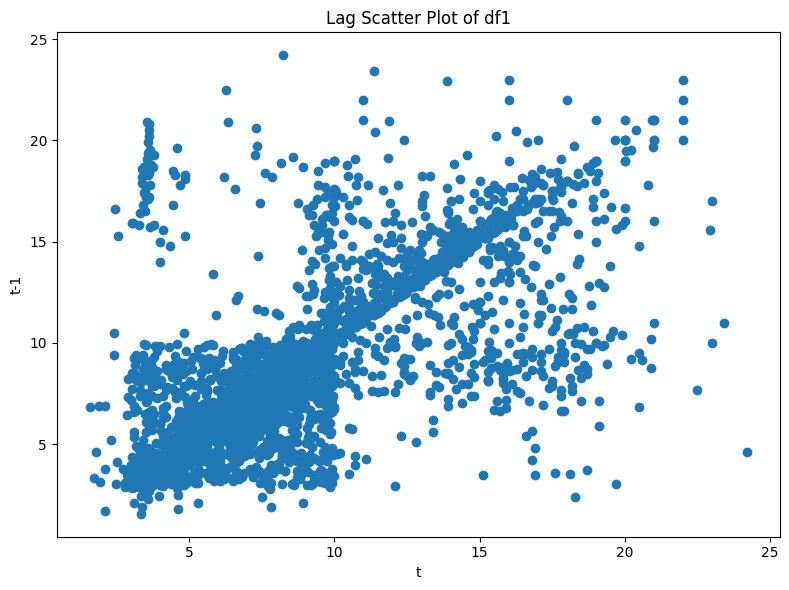

In [20]:
plt.figure(figsize=(8, 6))
lag_plot(df1)
plt.title("Lag Scatter Plot of df1")
plt.xlabel("t")
plt.ylabel("t-1")
plt.tight_layout()
plt.show()

#### 1. ¿Cómo se interpreta un Lag Scatter plot?

Los _lag scatter plot_ representan el la relación entre el tiempo actual $t$ y una serie de $k$ _lags_ o tiempos previos (en este caso $k-1$). Dependiendo de la dispersion o patron que forman los puntos podemos determinar la correlación de la serie.

#### 2. ¿Qué conclusiones puede sacar del comportamiento de los datos?

Se puede observar cierta tendencia positiva lineal combinada con ciertas partes dispersas especialmente en valores altos. Los valores mas bajos también tienden a concentrarse causando una especie de barriga al principio.

Se podría decir que existe autocorrelación entre los valores y que esto podría dar paso al uso de un modelo autoregresivo. También en combinación con los otros plots se sugiere la existencia de ruido en los valores dispersos.

### 1.10
- Muestre el gráfico autocorrelación de la variable series.
    1. ¿Cómo se interpreta este tipo de gráficos?
    2. ¿Qué conclusiones puede sacar del comportamiento de los datos?

<Figure size 1000x600 with 0 Axes>

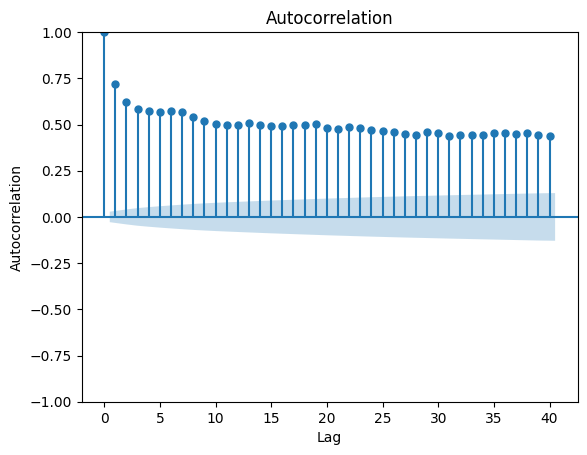

In [21]:
plt.figure(figsize=(10, 6))
plot_acf(df1, lags=40)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

# Parte 2. Diferenciación (15 puntos)

1. Luego, **utilizando el archivo `TS_d_2.csv`** realice la presente sección.
2. Complete en celdas de código y/o texto según convenga.
3. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

### 2.2
- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

### 2.3
- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

### 2.4
- ¿Esta serie requería Diferenciación o no? Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

# Parte 3.  ARIMA (15 puntos)

1. Luego, **utilizando el archivo `TS_d_3.csv`** realice la presente sección.
2. Complete en celdas de código y/o texto según convenga.
3. Documente bien su código.

### 3.1
- Explique en qué consiste ARIMA.

### 3.2
- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

### 3.3
- Analice si requiere hacer diferenciación o no. Explique

### 3.4
- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

### 3.5
- Grafique el predicho versus el real y comente sus conclusiones.

# Parte 4.  Regresión lineal y breve diseño experimental (20 puntos)

**Se le suministra un archivo llamado `TS_d_3.csv`**.

### 4.1
- Cargue el archivo en el orden en que vienen los datos y solo deje la columna temperatura.
- Muestre cuántas filas tiene el conjunto de datos.

### 4.2
- Como es solo una serie temporal, divida entre X_train y X_test (70% y 30%). Note que por ahora no tiene y (ni y_train, ni y_test)
- Muestre los tres primeros registros.

### 4.3
- Como todos los valores están en la misma escala y por si desea comprar el resultado con el ARIMA, no escale los datos. Ahora bien, entendiendo lo dicho anteriormente, puede escalar el X_train y X_test utilizando MinMaxScaler (pero cuidado al interpretar valores como el MSE).
- Indique qué decisión tomó y por qué.
- Muestre los tres primeros registros.

### 4.4
- Utilizando la técnica de Lag Features, procese tanto el train como el test con los valores y un Lag=5 y ahora si va tener y_train y y_test, pues serán el siguiente periodo a predecir.
- Muestre los tres primeros registros de cada uno.

### 4.5
- Vamos ahora a utilizar `sklearn` para calcular los pesos.
- Utilizando algún algoritmo de regresión de la biblioteca `sklearn` ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$.
- Comente los resultados obtenidos

# Parte 5.  Uso de biblioteca Prophet (15 puntos)

**Se le suministra un archivo llamado `trainV.csv`**.

Estudie el código que se le proporciona, luego busque otra serie temporal y aplique un proceso similar.

In [ ]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Mostrar los gráficos integrados dentro de jupyter notebook
%matplotlib inline

In [ ]:
from prophet import Prophet

In [ ]:
# incluir el enlace completo al archivo csv que contiene tu conjunto de datos
sales_df = pd.read_csv("trainV.csv", parse_dates=["Date"], dayfirst=True)
sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})

print(sales_df.size)
print(sales_df.head(20))

1562
           ds     y
0  2013-01-02  5530
1  2013-01-03  4327
2  2013-01-04  4486
3  2013-01-05  4997
4  2013-01-07  7176
5  2013-01-08  5580
6  2013-01-09  5471
7  2013-01-10  4892
8  2013-01-11  4881
9  2013-01-12  4952
10 2013-01-14  4717
11 2013-01-15  3900
12 2013-01-16  4008
13 2013-01-17  4044
14 2013-01-18  4127
15 2013-01-19  5182
16 2013-01-21  5394
17 2013-01-22  5720
18 2013-01-23  5578
19 2013-01-24  5195


In [ ]:
# Split: últimos x como test
horizon = 300
train = sales_df.iloc[:-horizon].copy()
test = sales_df.iloc[-horizon:].copy()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvd_5_79a/xp_tlepx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvd_5_79a/n0za3_u6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83948', 'data', 'file=/tmp/tmpvd_5_79a/xp_tlepx.json', 'init=/tmp/tmpvd_5_79a/n0za3_u6.json', 'output', 'file=/tmp/tmpvd_5_79a/prophet_modeljfhzawtw/prophet_model-20250911040716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:07:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:07:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE:   785.93
RMSE:  1036.902
MAPE:  16.84 %


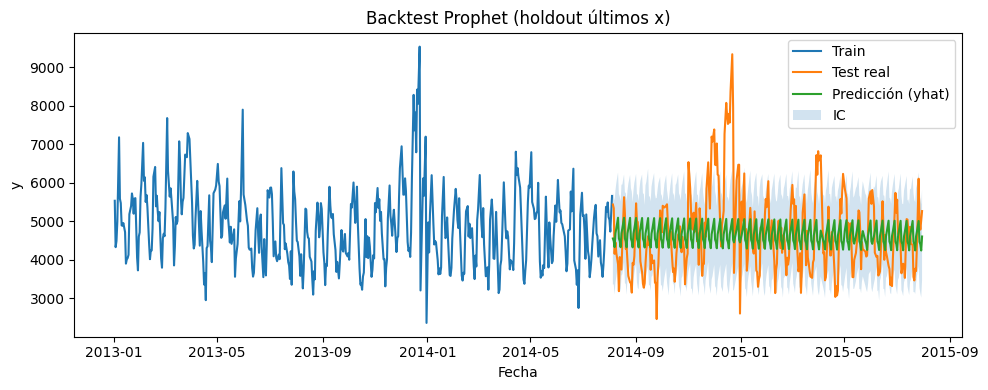

In [ ]:
m = Prophet(
    growth="linear",
    yearly_seasonality=False,
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    changepoint_prior_scale=0.05,
)
m.fit(train)

# %%
# Predecir para EXACTAMENTE las fechas del test (sin generar futuro extra)
future_test = test[["ds"]].copy()
forecast_test = m.predict(future_test)

# %%
# Comparar real vs. predicho y calcular métricas
comp = test.merge(
    forecast_test[["ds", "yhat", "yhat_lower", "yhat_upper"]], on="ds", how="left"
)


def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


def mape(y_true, y_pred):
    # Evita división por cero; ajusta a tu caso si hay ceros
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    eps = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (np.maximum(np.abs(y_true), eps)))) * 100


print("MAE:  ", round(mae(comp["y"], comp["yhat"]), 3))
print("RMSE: ", round(rmse(comp["y"], comp["yhat"]), 3))
print("MAPE: ", round(mape(comp["y"], comp["yhat"]), 2), "%")

# %%
# Gráfico simple de real vs. predicho (matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(train["ds"], train["y"], label="Train")
plt.plot(comp["ds"], comp["y"], label="Test real")
plt.plot(comp["ds"], comp["yhat"], label="Predicción (yhat)")
plt.fill_between(
    comp["ds"], comp["yhat_lower"], comp["yhat_upper"], alpha=0.2, label="IC"
)
plt.legend()
plt.title("Backtest Prophet (holdout últimos x)")
plt.xlabel("Fecha")
plt.ylabel("y")
plt.tight_layout()
plt.show()

### 5.1 Comente las principales conclusiones que obtiene luego de aplicar esta biblioteca a la serie temporal que Usted proporcionó
